In [1]:
import numpy as np
import elasticdeform
import matplotlib.pyplot as plt
from config import *
from glob import glob
import tifffile
import largestinteriorrectangle as lir
from augmentation import augmentation



In [2]:
def get_elastic_deform_and_crop(img, displacement=np.random.randn(2, 3, 3) * 7):

    ### img must have values between 0 and 1

    img_deformed = elasticdeform.deform_random_grid(img, displacement, axis=(0, 1))
    q = np.mean(img_deformed, -1)
    ret = (1 - (q == 0)).astype("bool")
    rect = lir.lir(ret)
    cropped_img_deformed = img_deformed[rect[1] : rect[3], rect[0] : rect[2]]
    return img

In [19]:
img = tifffile.imread(glob(path_images+'/*')[0])
displacement=np.random.randn(2, 3, 3) * 5
# plt.imshow(img)
print(img.shape)

(256, 256, 3)


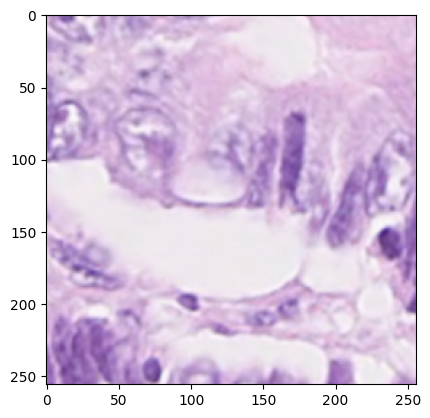

[[[0.74117647 0.61568627 0.79215686]
  [0.7372549  0.60784314 0.78823529]
  [0.70588235 0.57254902 0.76078431]
  ...
  [0.89803922 0.77647059 0.89411765]
  [0.89019608 0.77254902 0.89019608]
  [0.89019608 0.76862745 0.89019608]]

 [[0.80392157 0.68235294 0.83921569]
  [0.79607843 0.66666667 0.83529412]
  [0.75294118 0.61960784 0.79607843]
  ...
  [0.88627451 0.76862745 0.88235294]
  [0.88235294 0.76078431 0.87843137]
  [0.88235294 0.76078431 0.88235294]]

 [[0.85098039 0.72941176 0.87843137]
  [0.83921569 0.71764706 0.8627451 ]
  [0.79215686 0.6627451  0.82745098]
  ...
  [0.87843137 0.76078431 0.87843137]
  [0.87058824 0.75294118 0.87058824]
  [0.8745098  0.75294118 0.87058824]]

 ...

 [[0.62745098 0.45882353 0.72941176]
  [0.61960784 0.44705882 0.74901961]
  [0.61568627 0.43529412 0.74901961]
  ...
  [0.79215686 0.6627451  0.83529412]
  [0.8        0.6745098  0.83921569]
  [0.79607843 0.67058824 0.82745098]]

 [[0.61960784 0.45490196 0.7254902 ]
  [0.61960784 0.44705882 0.74901961]


In [29]:
img = tifffile.imread(glob(path_images+'/*')[0])
img0 = augmentation(img/255)
plt.imshow(img0)
plt.show()
print(img0)